모델 학습 시간 오래 걸림

## 2. LSTM 레이어

예를 들어 인공지능 비서에게 “오늘 주가가 몇이야?”라고 묻는다고 가정합시다. 그러면 아래을 보면, 해당하는 순환 부분에서 단어를 하나 처리할 때마다 단어마다 기억하여 다음 입력 값의 출력을 결정합니다. 
<img src='./imgs/rnn4.jpg'>

순환이 되는 가운데 앞서 나온 입력에 대한 결과가 뒤에 나오는 입력 값에 영향을 주는 것을 알 수 있습니다. 이렇게 해야지만, 비슷한 두 문장이 입력되었을 때 그 차이를 구별하여 출력 값에 반영할 수가 있습니다. 예를 들어 입력 2의 값은 양쪽 모두 ‘주가’이지만, 왼쪽의 주가는 오늘을 기준으로, 오른쪽은 어제를 기준으로 계산되어야 합니다.
<img src='./imgs/rnn5.jpg'>

RNN이 처음 개발된 이후, RNN의 결과를 더욱 개선하기 위한 노력이 계속되어 왔습니다. 이 중에서 LSTM(Long Short Term Memory) 방법을 함께 사용하는 기법이 현재 가장 널리 사용되고 있습니다. LSTM은 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법입니다. 즉, 반복되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더 추가하는 것입니다
<img src='./imgs/rnn6.jpg'>

[출처] [모두의 딥러닝](https://thebook.io/006958/part05/ch17-06/)


---

#### 곱셈 문제 ( Multiplication problem )

+ LST을 처음 제안한 논문의 나오는 문제
+ 실수에 대해 곱셈을 하는 문제
  ( 100개 중 마킹된 두 개의 숫자만 곱한다 ) 

In [1]:
import tensorflow as tf
import numpy as np


# (0) 곱셈 문제 데이터 생성
X = []
Y = []

# 데이타를 3000 -> 2000 으로 줄여서 확인 ( 시간 소요때문에 )
for i in range(3000):
    
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0])
print(Y[0])

# X의 0번째 열은 마킹 인덱스로 1이 두 번 있는데, 이를 곱한 값이 Y이다
#[1.         0.9438072 ]
#[1.         0.49831348]
# 0.9438072 * 0.49831348 => 0.4703118508136898

[[0.00000000e+00 3.86728457e-01]
 [0.00000000e+00 1.14332714e-01]
 [0.00000000e+00 3.10654103e-01]
 [0.00000000e+00 4.84269352e-01]
 [0.00000000e+00 8.81366718e-01]
 [0.00000000e+00 1.49949466e-01]
 [0.00000000e+00 4.87848522e-01]
 [0.00000000e+00 3.56194832e-01]
 [0.00000000e+00 3.23910774e-01]
 [0.00000000e+00 2.95719076e-01]
 [0.00000000e+00 6.89980714e-01]
 [0.00000000e+00 6.50817690e-02]
 [0.00000000e+00 9.30072069e-01]
 [0.00000000e+00 9.93321370e-01]
 [0.00000000e+00 8.14540836e-02]
 [0.00000000e+00 4.89668335e-01]
 [0.00000000e+00 9.19455684e-01]
 [0.00000000e+00 7.22777215e-01]
 [0.00000000e+00 3.91330028e-01]
 [0.00000000e+00 1.12985567e-02]
 [0.00000000e+00 7.23314887e-01]
 [0.00000000e+00 2.44721919e-01]
 [0.00000000e+00 8.35233460e-02]
 [0.00000000e+00 5.74743899e-01]
 [0.00000000e+00 5.03900315e-01]
 [0.00000000e+00 8.73465865e-01]
 [0.00000000e+00 6.31788589e-01]
 [0.00000000e+00 3.85103839e-01]
 [0.00000000e+00 3.31427208e-01]
 [0.00000000e+00 5.07721845e-01]
 [0.000000

## (1) SimpleRNN 레이어 이용

In [2]:
# (1-1) SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의
#     첫번째 SimpleRNN에서 return_sequences=True를 지정하여 레이어의 출력을 다음 레이어로 그래도 넘겨준다
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [3]:
# (1-2) SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
# 나머지 440개는 나중에 테스트 데이타로 사용한다.
# 데이타수를 3000-> 2000으로 줄였으면 2560->1560으로 줄인다
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)


# [결과]
# 훈련 데이타의 손실 loss는 점차 감소하지만, 검증 데이타의 손실 val_loss는 오히려 증가하는 듯한다.
# 이것을 아래 그래프로 다시 확인한다.
# 그래프를 확인하면 전형적인 과적합그래프이다.

Epoch 1/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0706 - val_loss: 0.0554
Epoch 2/100
64/64 [==============================] - 2s 26ms/step - loss: 0.0471 - val_loss: 0.0539
Epoch 3/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0460 - val_loss: 0.0543
Epoch 4/100
64/64 [==============================] - 2s 26ms/step - loss: 0.0457 - val_loss: 0.0541
Epoch 5/100
64/64 [==============================] - 2s 26ms/step - loss: 0.0464 - val_loss: 0.0538
Epoch 6/100
64/64 [==============================] - 2s 26ms/step - loss: 0.0456 - val_loss: 0.0627
Epoch 7/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0464 - val_loss: 0.0567
Epoch 8/100
64/64 [==============================] - 2s 26ms/step - loss: 0.0455 - val_loss: 0.0542
Epoch 9/100
64/64 [==============================] - 2s 26ms/step - loss: 0.0455 - val_loss: 0.0539
Epoch 10/100
64/64 [==============================] - 2s 26ms/step - loss: 0.0456 - val_loss: 0.0581

64/64 [==============================] - 2s 27ms/step - loss: 0.0328 - val_loss: 0.0632
Epoch 83/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0323 - val_loss: 0.0641
Epoch 84/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0322 - val_loss: 0.0645
Epoch 85/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0325 - val_loss: 0.0641
Epoch 86/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0323 - val_loss: 0.0652
Epoch 87/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0317 - val_loss: 0.0725
Epoch 88/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0324 - val_loss: 0.0656
Epoch 89/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0309 - val_loss: 0.0645
Epoch 90/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0305 - val_loss: 0.0667
Epoch 91/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0308 - val_loss: 0.0682
Epo

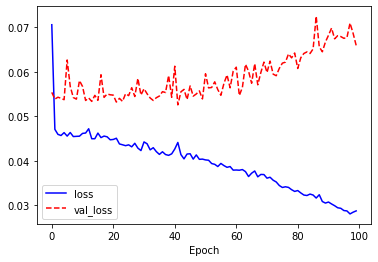

In [4]:
# (1-3) SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [5]:
# (1-4) Test(훈련) 데이터에 대한 예측 정확도 확인

# 훈련 데이타 수를 3000-> 2000 줄였으면 2560 -> 1560으로 같이 줄인다.
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# [결과] 
#       전체에 대한 평가(evaluate)는 loss: 0.0900 인데,
#       앞에서 본 100번째 epoch의 val_loss 0.0598보다 높게 나왔다.
# Epoch 100/100
# 2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0287 - val_loss: 0.0598
#        즉, 네트워크가 학습 과정에서 한 번도 못 본 테이스 데이타에 대해 예측을 잘 하지 못한다는 것이다.

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
# [결과] 
#     5개의 샘플만 보더라도 오차(diff)가 다양하게 나온다   
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다. ( 논문에 의해 )
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')
# [결과]
#     정확도는 10% 정도인 것이다.

14/14 [==============================] - 0s 9ms/step - loss: 0.0580
0.3177195470065259 	 0.3075257 	diff: 0.010193852636256107
0.1480333706714809 	 0.2357547 	diff: 0.08772132784345746
0.5133554767595179 	 0.06605837 	diff: 0.44729710926874944
0.28590685529463833 	 0.10735294 	diff: 0.17855391306632107
0.6898245229008753 	 0.18679658 	diff: 0.503027947116192
correctness: 11.363636363636363 %


## (2) LSTM 레이어 이용

In [6]:
# (2-2) LSTM 레이어를 사용한 곱셈 문제 모델 정의
#       (1-2)에서 SimpleRNN -> LSTM 변경
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [7]:
# (2-2) LSTM 네트워크 학습
#       (1-2)와 동일
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0476 - val_loss: 0.0531
Epoch 2/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0452 - val_loss: 0.0531
Epoch 3/100
64/64 [==============================] - 3s 49ms/step - loss: 0.0452 - val_loss: 0.0545
Epoch 4/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0453 - val_loss: 0.0533
Epoch 5/100
64/64 [==============================] - 3s 49ms/step - loss: 0.0454 - val_loss: 0.0539
Epoch 6/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0452 - val_loss: 0.0530
Epoch 7/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0450 - val_loss: 0.0530
Epoch 8/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0450 - val_loss: 0.0531
Epoch 9/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0451 - val_loss: 0.0530
Epoch 10/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0451 - val_loss: 0.0530

64/64 [==============================] - 4s 56ms/step - loss: 5.6644e-04 - val_loss: 9.9624e-04
Epoch 82/100
64/64 [==============================] - 4s 64ms/step - loss: 6.7098e-04 - val_loss: 0.0010
Epoch 83/100
64/64 [==============================] - 3s 54ms/step - loss: 6.2262e-04 - val_loss: 6.3350e-04
Epoch 84/100
64/64 [==============================] - 3s 54ms/step - loss: 5.6357e-04 - val_loss: 5.5179e-04
Epoch 85/100
64/64 [==============================] - 4s 56ms/step - loss: 5.7111e-04 - val_loss: 7.5669e-04
Epoch 86/100
64/64 [==============================] - 5s 75ms/step - loss: 5.9635e-04 - val_loss: 9.5091e-04
Epoch 87/100
64/64 [==============================] - 4s 61ms/step - loss: 7.1892e-04 - val_loss: 8.8658e-04
Epoch 88/100
64/64 [==============================] - 3s 52ms/step - loss: 5.3762e-04 - val_loss: 5.8830e-04
Epoch 89/100
64/64 [==============================] - 3s 51ms/step - loss: 4.3780e-04 - val_loss: 6.9204e-04
Epoch 90/100
64/64 [================

[ 결과 ]  

        SimpleRNN -> LSTM 으로 변경만 했을 뿐인데,
        처음에는 loss와 val_loss가 줄지 않는 듯하다가 나중에 둘 다 모두 급격하게 작아진다.
        
        아래 그래프로 확인
        40 Epoch로 지나면서 매우 가파르게 loss와 val_loss가 감소한다.
        학습이 매우 잘 된 것이라 할 수 있다.

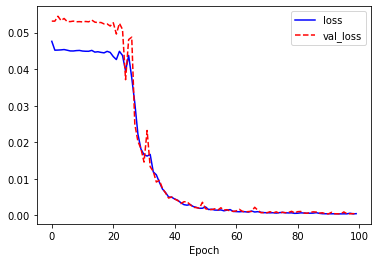

In [8]:
# (2-3)LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [9]:
# (2-4)Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

# [결과]
#  테스트 데이터에 대한 loss는 0에 가깝게 나오고, 다섯 개의 샘플에 대한 오차도 0.04를 넘지 않는다.
# 모든 테스트 데이터에 대한 정확도는 correctness: 92.5 %로 SimpleRNN보다 LSTM이 훨씬 적합하다는 것을 알 수 있다.

14/14 [==============================] - 0s 17ms/step - loss: 4.0606e-04
0.3177195470065259 	 0.30181336 	diff: 0.015906182977595218
0.1480333706714809 	 0.15830438 	diff: 0.010271007718831299
0.5133554767595179 	 0.47828072 	diff: 0.035074753664577685
0.28590685529463833 	 0.30642104 	diff: 0.020514186194009132
0.6898245229008753 	 0.7331144 	diff: 0.043289898466770005
correctness: 95.22727272727273 %


## (3) GRU (Gated Recurrent Unit) 레이어

+ 뉴욕대학교의 조경현 교수 등이 제안한 구조
+ GRU 레이어는 LSTM 레이어와 비슷한 역할을 하지만 구조가 훨씬 간단해서 어떤 문제에서는 LSTM보다 좋은 성능을 보이기도 한다.

In [10]:
# (1) GRU 레이어를 사용한 곱셈 문제 모델 정의 (여기만 GRU로 수정 )
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


#### [비교] 곱셈 문제를 풀기 위한 네트워크 파리미터 수
    
        - SimpleRNN : 2851
        - LSTM :     11311
        - GRU :       8671
        
        ` GRU 레이어를 사용한 네트워크의 파라미터가 LSTM 레이어 사용시보다 적다.

In [11]:
# (2) GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0475 - val_loss: 0.0538
Epoch 2/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0457 - val_loss: 0.0534
Epoch 3/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0451 - val_loss: 0.0530
Epoch 4/100
64/64 [==============================] - 3s 49ms/step - loss: 0.0453 - val_loss: 0.0532
Epoch 5/100
64/64 [==============================] - 4s 58ms/step - loss: 0.0450 - val_loss: 0.0529
Epoch 6/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0450 - val_loss: 0.0531
Epoch 7/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0448 - val_loss: 0.0527- ETA
Epoch 8/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0451 - val_loss: 0.0527
Epoch 9/100
64/64 [==============================] - 3s 49ms/step - loss: 0.0445 - val_loss: 0.0528
Epoch 10/100
64/64 [==============================] - 3s 49ms/step - loss: 0.0449 - val_loss: 0

64/64 [==============================] - 3s 43ms/step - loss: 1.9272e-04 - val_loss: 2.2978e-04
Epoch 79/100
64/64 [==============================] - 3s 43ms/step - loss: 2.3927e-04 - val_loss: 1.9184e-04
Epoch 80/100
64/64 [==============================] - 3s 43ms/step - loss: 1.8504e-04 - val_loss: 2.0131e-04
Epoch 81/100
64/64 [==============================] - 3s 44ms/step - loss: 1.6398e-04 - val_loss: 1.9163e-04
Epoch 82/100
64/64 [==============================] - 3s 43ms/step - loss: 1.8344e-04 - val_loss: 2.2369e-04
Epoch 83/100
64/64 [==============================] - 3s 44ms/step - loss: 1.6561e-04 - val_loss: 2.1807e-04
Epoch 84/100
64/64 [==============================] - 3s 45ms/step - loss: 1.8977e-04 - val_loss: 3.2863e-04
Epoch 85/100
64/64 [==============================] - 3s 44ms/step - loss: 1.7122e-04 - val_loss: 1.7796e-04
Epoch 86/100
64/64 [==============================] - 3s 44ms/step - loss: 1.3918e-04 - val_loss: 1.6372e-04
Epoch 87/100
64/64 [============

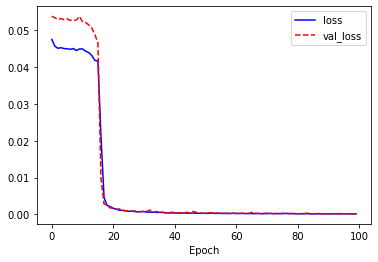

In [12]:
# (3) GRU 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [13]:
# (4) Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 13ms/step - loss: 2.6304e-04
0.3177195470065259 	 0.30698568 	diff: 0.010733870717921146
0.1480333706714809 	 0.13996616 	diff: 0.008067210612505676
0.5133554767595179 	 0.51125306 	diff: 0.0021024178491479972
0.28590685529463833 	 0.29168794 	diff: 0.0057810802961056895
0.6898245229008753 	 0.7026985 	diff: 0.012874005865756821
correctness: 98.4090909090909 %
